# Clasificación construyendo perceptron

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

Creamos la variable data que contiene tanto los valores de entrada (features) y las etiquetas (labels).

La primera columna es la altura en metros, la segunda el peso en kilos y la tercera es el tamaño del pie en metros.

La cuarta columna corresponde al sexo. El valor 0 corresponde a hombres y el valor 1 corresponde a mujeres.

In [2]:
data = [[1.81, 0.80, 0.44, 0],
        [1.77, 0.70, 0.43, 0],
        [1.60, 0.60, 0.38, 1],
        [1.54, 0.54, 0.37, 1],
        [1.66, 0.65, 0.40, 0],
        [1.90, 0.90, 0.47, 0],
        [1.75, 0.64, 0.39, 1],
        [1.77, 0.70, 0.40, 1],
        [1.59, 0.55, 0.37, 1],
        [1.71, 0.75, 0.42, 0],
        [1.81, 0.85, 0.43, 0]]

Numero de registros en la tabla

In [3]:
len(data)

11

Extraer tercera fila

In [4]:
data[2]

[1.6, 0.6, 0.38, 1]

In [5]:
data_np=np.array(data)
data_np

array([[1.81, 0.8 , 0.44, 0.  ],
       [1.77, 0.7 , 0.43, 0.  ],
       [1.6 , 0.6 , 0.38, 1.  ],
       [1.54, 0.54, 0.37, 1.  ],
       [1.66, 0.65, 0.4 , 0.  ],
       [1.9 , 0.9 , 0.47, 0.  ],
       [1.75, 0.64, 0.39, 1.  ],
       [1.77, 0.7 , 0.4 , 1.  ],
       [1.59, 0.55, 0.37, 1.  ],
       [1.71, 0.75, 0.42, 0.  ],
       [1.81, 0.85, 0.43, 0.  ]])

In [6]:
data_np[:,0]

array([1.81, 1.77, 1.6 , 1.54, 1.66, 1.9 , 1.75, 1.77, 1.59, 1.71, 1.81])

In [7]:
data_np[:,1]

array([0.8 , 0.7 , 0.6 , 0.54, 0.65, 0.9 , 0.64, 0.7 , 0.55, 0.75, 0.85])

In [8]:
data_np[:,2]

array([0.44, 0.43, 0.38, 0.37, 0.4 , 0.47, 0.39, 0.4 , 0.37, 0.42, 0.43])

Convertimos la columna de sexo en una lista de colores

In [9]:
colors=['red', 'blue']
labels=np.array(data_np[:,3], dtype=int)
np.array(colors)[labels]

array(['red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue',
       'red', 'red'], dtype='<U4')

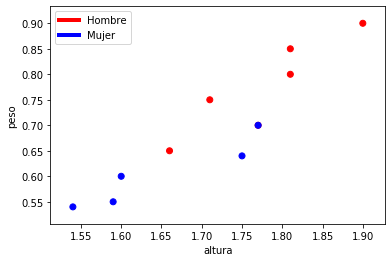

In [10]:
plt.scatter(data_np[:,0], data_np[:,1], c=np.array(colors)[labels])

plt.xlabel("altura")
plt.ylabel("peso")

custom_lines = [matplotlib.lines.Line2D([0], [0], color="red", lw=4),
                matplotlib.lines.Line2D([0], [0], color="blue", lw=4)]
plt.legend(custom_lines, ['Hombre', 'Mujer'])

Definir funcion de activación y derivada

In [11]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

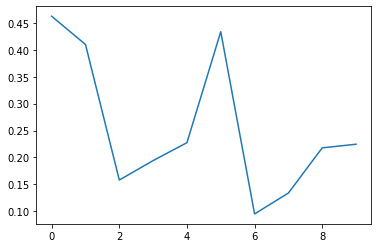

In [12]:
# loop de entrenamiento

learning_rate = 0.2
n_iterations = 1000

costs = []

w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
b = np.random.randn()

for i in range(n_iterations):
    random_row = np.random.randint(len(data))
    point = data[random_row]
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b
    prediction = sigmoid(z)
    
    target = point[3]
    cost = np.square(prediction - target)
    
    dcost_prediction = 2 * (prediction - target)
    dprediction_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_dw3 = point[2]
    dz_db = 1
    
    dcost_dz = dcost_prediction * dprediction_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_dw3 = dcost_dz * dz_dw3
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    w3 = w3 - learning_rate * dcost_dw3
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[random_row]
            
            z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b
            prediction = sigmoid(z)
            
            target = point[3]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(data))

plt.plot(costs)

In [13]:
# loop de predicciones

for i in range(len(data)) :
    point = data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b
    prediction = sigmoid(z)
    print("predicción : {}" .format(prediction))

[1.81, 0.8, 0.44, 0]
predicción : 0.22894370874423184
[1.77, 0.7, 0.43, 0]
predicción : 0.2637516383734945
[1.6, 0.6, 0.38, 1]
predicción : 0.31576947352237766
[1.54, 0.54, 0.37, 1]
predicción : 0.34324034028667433
[1.66, 0.65, 0.4, 0]
predicción : 0.2911620320101571
[1.9, 0.9, 0.47, 0]
predicción : 0.19288185050356998
[1.75, 0.64, 0.39, 1]
predicción : 0.29232561368231763
[1.77, 0.7, 0.4, 1]
predicción : 0.26904773227416373
[1.59, 0.55, 0.37, 1]
predicción : 0.336894147991028
[1.71, 0.75, 0.42, 0]
predicción : 0.25185015782963815
[1.81, 0.85, 0.43, 0]
predicción : 0.21584061251331915


Supongamos que llega un nuevo registro y necesitamos determinar a qué sexo pertenece

In [14]:
point_new = [1.63, 0.60, 0.37]

In [15]:
z = point_new[0] * w1 + point_new[1] * w2 + point_new[2] * w3 + b
prediction = sigmoid(z)
prediction

0.31625465769519295

In [16]:
def determinar_sexo(height, weight, shoe_size) :
    z = height * w1 + weight * w2 + shoe_size * w3 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print('hombre')
    else:
        print('mujer')

In [17]:
determinar_sexo(1.63, 0.60, 0.37)

hombre


In [18]:
determinar_sexo(1.62, 0.49, 0.38)

hombre
